# Challenge 6: Where There is Smoke

## Machine vision modeling


1) Image Classification


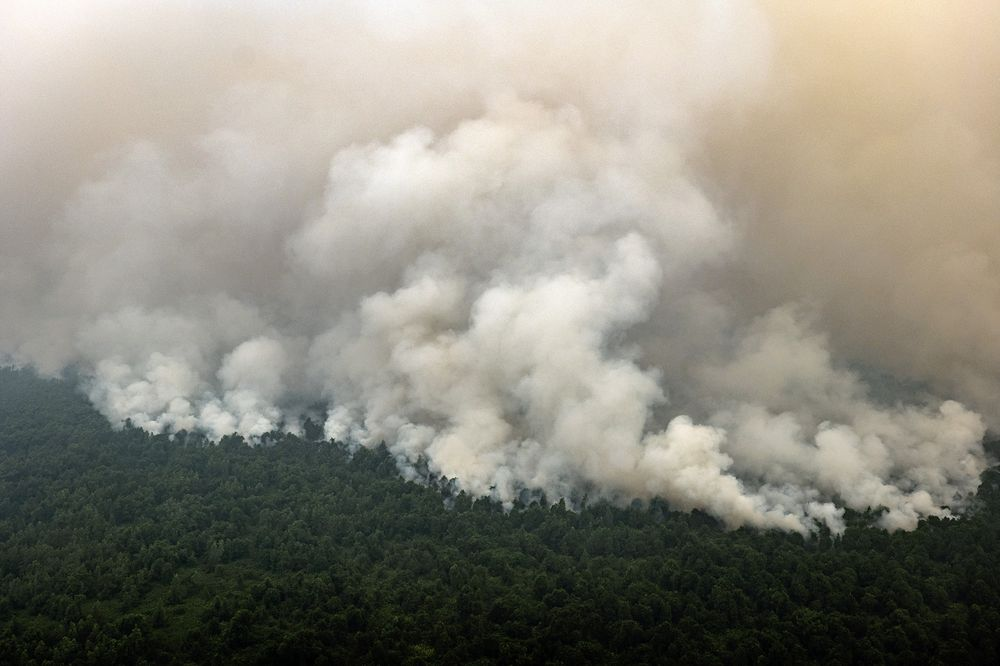


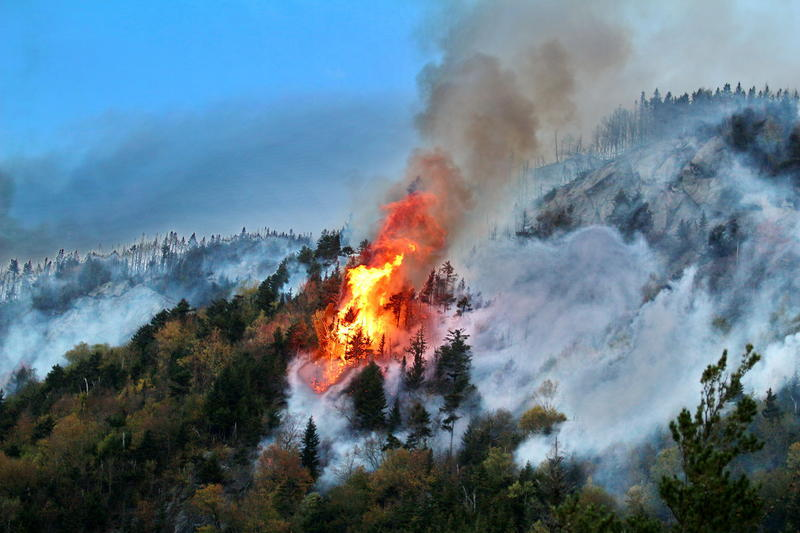

In [1]:
import os
os.getcwd()

'/home/dsxuser/work'

In [3]:
! pip install ibm-cos-sdk -q

In [3]:
# try to get 2.2.4 to work, but it might not. Let 2.1.4 fill in for the time being. It at least will run.
# ! pip install keras==2.2.4
! pip install keras==2.1.4 -q

In [4]:
! pip install tensorflow==1.9 -q

In [5]:
! pip install h5py -q

In [2]:
import zipfile

In [3]:
from ibm_botocore.client import Config
import ibm_boto3

In [4]:
credentials_1 = {
    'IAM_SERVICE_ID': 'Auto-generated for key 15c2aba7-715b-4157-9d81-0075b207c5ec',
    'IBM_API_KEY_ID': 'MHYDZ0jZYSqDgr9tDKhCQMiZmbX_WhYoEF-GAeqvCyf2',
    'ENDPOINT': 'https://s3.ap.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'watson-warrior-alpha',
    'FILE': 'data_asset/wt_big_sur_sat_data_2016.csv_shaped_f35c000b.csv'
}

In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials_1['ENDPOINT'])

In [7]:
cos.download_file(Bucket=credentials_1['BUCKET'],Key='FIRE-SMOKE-DATASET.zip',Filename='FIRE-SMOKE-DATASET.zip')
cos.download_file(Bucket=credentials_1['BUCKET'],Key='fire-smoke-neutral-inference-images.zip',Filename='fire-smoke-neutral-inference-images.zip')
# cos.download_file(Bucket=credentials_1['BUCKET'],Key='smoke_fire_vgg_img_aug.h5',Filename='smoke_fire_vgg_img_aug.h5')
cos.download_file(Bucket=credentials_1['BUCKET'],Key='smoke_fire_vgg_small.h5',Filename='smoke_fire_vgg_small.h5')
cos.download_file(Bucket=credentials_1['BUCKET'],Key='smoke_fire_vgg_small.h5',Filename='smoke_fire_vgg_big.h5')

In [8]:
! ls -larp

total 591560
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_small.h5
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_big.h5
-rw-r----- 1 dsxuser dsxuser  58125680 Jan  8 17:48 fire-smoke-neutral-inference-images.zip
-rw-r----- 1 dsxuser dsxuser 220024640 Jan  8 17:48 FIRE-SMOKE-DATASET.zip
drwx------ 1 dsxuser dsxuser      4096 Jan  8 17:47 ../
drwxr-x--- 2 dsxuser dsxuser      4096 Jan  8 17:48 ./


In [9]:
with zipfile.ZipFile('/home/dsxuser/work/FIRE-SMOKE-DATASET.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/dsxuser/work/')

In [10]:
with zipfile.ZipFile('/home/dsxuser/work/fire-smoke-neutral-inference-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/dsxuser/work/')   

In [11]:
! ls -larp

total 591568
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_small.h5
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_big.h5
-rw-r----- 1 dsxuser dsxuser  58125680 Jan  8 17:48 fire-smoke-neutral-inference-images.zip
drwxr-x--- 5 dsxuser dsxuser      4096 Jan  8 17:49 fire-smoke-neutral-inference-images/
-rw-r----- 1 dsxuser dsxuser 220024640 Jan  8 17:48 FIRE-SMOKE-DATASET.zip
drwxr-x--- 4 dsxuser dsxuser      4096 Jan  8 17:48 FIRE-SMOKE-DATASET/
drwx------ 1 dsxuser dsxuser      4096 Jan  8 17:47 ../
drwxr-x--- 4 dsxuser dsxuser      4096 Jan  8 17:49 ./


In [12]:
! ls FIRE-SMOKE-DATASET/


Test  Train


In [1]:
import pandas as pd

import numpy as np
import os
import glob
import keras
import matplotlib.pyplot as plt
import h5py
import shutil
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet , ResNet50 , vgg16 
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.models import Model, load_model , Sequential
from keras.optimizers import Adam
from tensorflow import ConfigProto
from tensorflow import InteractiveSession


ModuleNotFoundError: No module named 'ww'

In [14]:
#### Do not delete
# cos.download_file(Bucket=credentials_1['BUCKET'],Key='asl_mobile_netv2.h5',Filename='asl_mobile_netv2.h5')     # first model is called 'asl_mobile_net.h5'   the second is called 'asl_mobile_netv2.h5'
# from keras.utils.generic_utils import CustomObjectScope

model = load_model(  'smoke_fire_vgg_small.h5' )
# model = load_model(  'smoke_fire_vgg_img_aug.h5' )
# model = load_model(  'smoke_fire_vgg_cloud.h5' )
# with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
# model = load_model('asl_mobile_netv2.h5')
model.summary()

###### Save this!!! It is the only way that I can find to reload a model from memory!!!!!!! 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 25088)             14714688  
_________________________________________________________________
dense_10 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 1539      
Total params: 27,824,451
Trainable params: 13,109,763
Non-trainable params: 14,714,688
_________________________________________________________________


# Import pictures, sort, and create train, validate and test sets. 

In [15]:
# View image size 
from PIL import Image

im = Image.open('FIRE-SMOKE-DATASET/Test/Fire/image_0.jpg')
width, height = im.size
print(height, width)

168 300


In [16]:
files = glob.glob('FIRE-SMOKE-DATASET/**/**/*.jpg', recursive=True)
neutral_files = [fn for fn in files if 'Neutral' in fn]
smoke_files = [fn for fn in files if 'Fire' in fn]
fire_files = [fn for fn in files if 'Smoke' in fn]

len(neutral_files), len(smoke_files) , len(fire_files)

(2046, 3081, 3123)

In [17]:
files = glob.glob('FIRE-SMOKE-DATASET/Train/**/*.jpg', recursive=True)

neutral_files_train = [ fn for fn in files if 'Neutral' in fn]
smoke_files_train = [ fn for fn in files if 'Fire' in fn]
fire_files_train = [ fn for fn in files if 'Smoke' in fn]

len(neutral_files_train), len(smoke_files_train) , len(fire_files_train)
# neutral_files_train


(557, 925, 925)

In [18]:
files = glob.glob('FIRE-SMOKE-DATASET/Test/**/*.jpg', recursive=True)

neutral_files_val = [fn for fn in files if 'Neutral' in fn]
smoke_files_val = [fn for fn in files if 'Fire' in fn]
fire_files_val = [fn for fn in files if 'Smoke' in fn]

len(neutral_files_val), len(smoke_files_val) , len(fire_files_val)
# neutral_files_val

(125, 102, 116)

In [19]:
files = glob.glob('fire-smoke-neutral-inference-images/**/*.jpg', recursive=True)

neutral_files_test = [fn for fn in files if 'Neutral' in fn]
smoke_files_test = [fn for fn in files if 'Fire' in fn]
fire_files_test = [fn for fn in files if 'Smoke' in fn]

len(neutral_files_test), len(smoke_files_test) , len(fire_files_test)
# neutral_files_test

(84, 80, 69)

In [20]:
neutral_train = np.random.choice(neutral_files, size=557, replace=False)
smoke_train = np.random.choice(smoke_files, size=900, replace=False)
fire_train = np.random.choice(fire_files, size=900, replace=False)
len(neutral_train), len(smoke_train) , len(fire_train)
# neutral_files_train

(557, 900, 900)

In [21]:
neutral_val = np.random.choice(neutral_files_val, size=125, replace=False)
smoke_val = np.random.choice(smoke_files_val, size=102, replace=False)
fire_val = np.random.choice(fire_files_val, size=116, replace=False)
len(neutral_val) , len(smoke_val) , len(fire_val)

(125, 102, 116)

In [22]:
neutral_test = np.random.choice(neutral_files_test, size=84, replace=False)
smoke_test = np.random.choice(smoke_files_test, size=80, replace=False)
fire_test = np.random.choice(fire_files_test, size=69, replace=False)
len(neutral_test) , len(smoke_test) , len(fire_test)
# neutral_test

(84, 80, 69)

In [23]:
print('Neutral datasets:', neutral_train.shape,  neutral_val.shape, neutral_test.shape)
print('Smoke datasets:', smoke_train.shape,  smoke_val.shape, smoke_test.shape)
print('Fire datasets:', fire_train.shape,  fire_val.shape, fire_test.shape)

Neutral datasets: (557,) (125,) (84,)
Smoke datasets: (900,) (102,) (80,)
Fire datasets: (900,) (116,) (69,)


In [24]:
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

In [25]:
train_files = np.concatenate([ neutral_train , smoke_train , fire_train])
validate_files = np.concatenate([ neutral_val , smoke_val , fire_val])
test_files = np.concatenate([ neutral_test , smoke_test , fire_test])

In [26]:
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

In [27]:
for idx, fn in enumerate(train_files):
#     print(fn)
    shutil.copy(fn, train_dir + '/' + str(fn.split('/')[-2]) + '_' + str(fn.split('/')[-1]))

In [28]:
for fn in validate_files:
    shutil.copy(fn, val_dir + '/' + str(fn.split('/')[-2]) + '_' + str(fn.split('/')[-1]))

In [29]:
for fn in test_files:
    shutil.copy(fn, test_dir + '/' + str(fn.split('/')[-2]) + '_' + str(fn.split('/')[-1]))
    

In [30]:
IMG_DIM = (224,224)

In [31]:
train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('_')[0].strip() for fn in train_files] #   

In [32]:
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('_')[0].strip() for fn in validation_files]
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (1642, 224, 224, 3) 	Validation dataset shape: (343, 224, 224, 3)


In [33]:
test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('_')[0].strip() for fn in test_files]
print('test dataset shape:', test_imgs.shape )
#       '\ttest dataset shape:', test_imgs.shape)

test dataset shape: (233, 224, 224, 3)


(224, 224, 3)


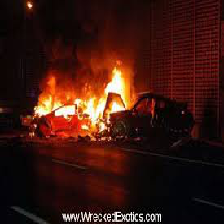

In [34]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [35]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)
test_labels_enc = le.transform(test_labels)

In [36]:
# print(train_labels[1:200], train_labels_enc[1:200])

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
labels = ["Fire" , "Neutral" , "Smoke"]

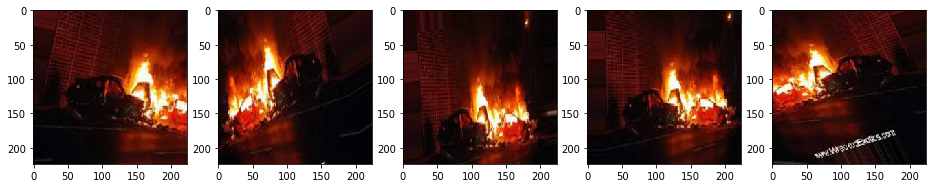

In [38]:
img_id = train_labels.index('Fire')
fire_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
fire = [next(fire_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
# print('Labels:', [item[1][0] for item in fire])

l = [ax[i].imshow(fire[i][0][0]) for i in range(0,5)]

What is your label for this image? Flames


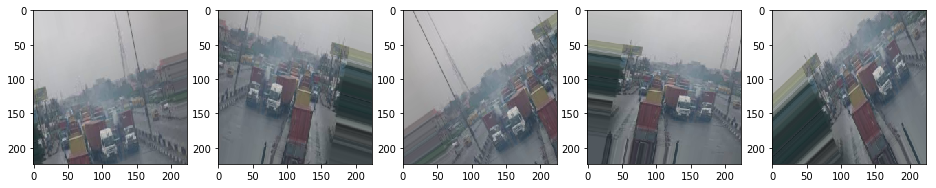

In [39]:
labels[0]= (input("What is your label for this image? "))
img_id = train_labels.index('Neutral')
neutral_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
neutral= [next(neutral_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
# print('Labels:', [item[1][0] for item in neutral])
l = [ax[i].imshow(neutral[i][0][0]) for i in range(0,5)]

What is your label for this image? Switzerland


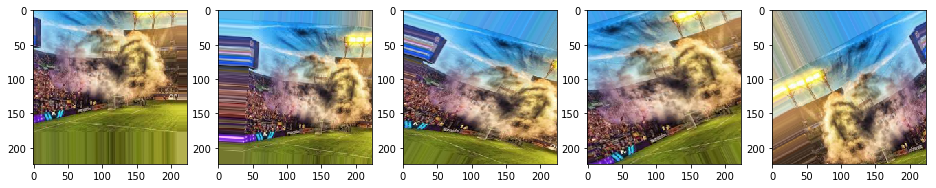

In [41]:
labels[1]= (input("What is your label for this image? "))
img_id = train_labels.index('Smoke')
smoke_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
smoke = [next(smoke_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
# print('Labels:', [item[1][0] for item in smoke])
l = [ax[i].imshow(smoke[i][0][0]) for i in range(0,5)]

In [42]:
labels[2]= (input("What is your label for this image? "))

What is your label for this image? That's Smoking!


# This is the new model taining section 

In [43]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
import keras 
import pandas as pd
from keras.models import Sequential
from keras import optimizers
from keras.applications import mobilenet, vgg16
from keras.models import Model, load_model , Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

input_shape = (224, 224, 3)

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)
# vgg = mobilenet.MobileNet(include_top=False, weights='imagenet', 
#                                      input_shape=input_shape)


output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False

    
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


input_shape = vgg_model.output_shape[1]
input_shape


vgg_model.trainable = False


vgg_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255, 
#                                    zoom_range=0.3, 
#                                    rotation_range=50,
#                                    width_shift_range=0.2, 
#                                    height_shift_range=0.2, 
#                                    shear_range=0.2, 
                                   horizontal_flip=False, 
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [45]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=2)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=2)

In [46]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
# model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [47]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              

In [48]:
history = model.fit_generator(train_generator, steps_per_epoch=200, epochs=1,
                              validation_data=val_generator, validation_steps=100, 
                              verbose=1)     
# 546 seconds to complete
# 323 with largest compute instance ~ 2:30 min sec

Epoch 1/1
200/200 [==============================] - 342s 2s/step - loss: 0.9374 - acc: 0.5725 - val_loss: 1.0286 - val_acc: 0.6150


In [52]:
team = (input("What is your name? "))

model_name = 'smoke_fire_cloud_' + str(team.strip()) + '.h5'

model.save(model_name)

What is your name? stinky


In [53]:
cos.upload_file(Bucket=credentials_1['BUCKET'],Key=model_name,Filename=model_name)

## Now we will be able to have a machine learning model help us to detect fire.

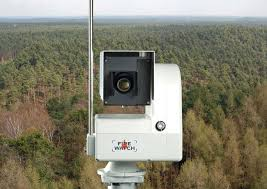

In [54]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
%matplotlib inline

In [55]:
from keras.models import load_model
model = load_model('smoke_fire_vgg_small.h5' ) 


In [56]:
model_input_shape = (1,)+model.get_input_shape_at(0)[1:]

DATASET_PATH = test_files                          
LABEL_PATH = test_labels                             

# labels = ["Fire" , "Neutral" , "Smoke"]

# This function prepares a random batch from the dataset
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(np.arange(0,
                                                              len(dataset_df)))[:batch_size],:]
    return batch_df
    
# This function plots sample images in specified size and in defined grid
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(16, 16)
#     print ( test_files[ batch_df[0].index[0] ] ,  test_labels[ batch_df[0].index[0] ]  )
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            actual_label =  test_labels[ batch_df[0].index[img_idx] ]
            # load an image from file
            image = load_img(test_files[ batch_df[0].index[img_idx] ], target_size=(224, 224))
            # convert the image pixels to a numpy array
            image = img_to_array(image)
            # reshape data for the model
            ax[i][j].imshow(image/255. )
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            # prepare the image for the VGG model
            image = preprocess_input(image)
            # load the model
            # predict the probability across all output classes
            prediction = model.predict(image)
            actual_label = test_labels[ batch_df[0].index[img_idx] ]
            label_idx = np.argmax(prediction)
            predicted_label = labels[label_idx]
            conf = round(prediction[0][label_idx], 2)
            ax[i][j].set_title('Actual: '+actual_label+'\n Pred: '+predicted_label + '    Conf: ' +str(conf) , fontsize = 8)
            img_path =  test_files[ batch_df[0].index[img_idx]]
            img_idx += 1


            
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

<Figure size 432x288 with 0 Axes>

In [57]:
# load dataset and visualize sample data
# pd.DataFrame(test_labels) 
dataset_df =  pd.DataFrame(test_labels)  
batch_df = load_batch(dataset_df, batch_size=36)

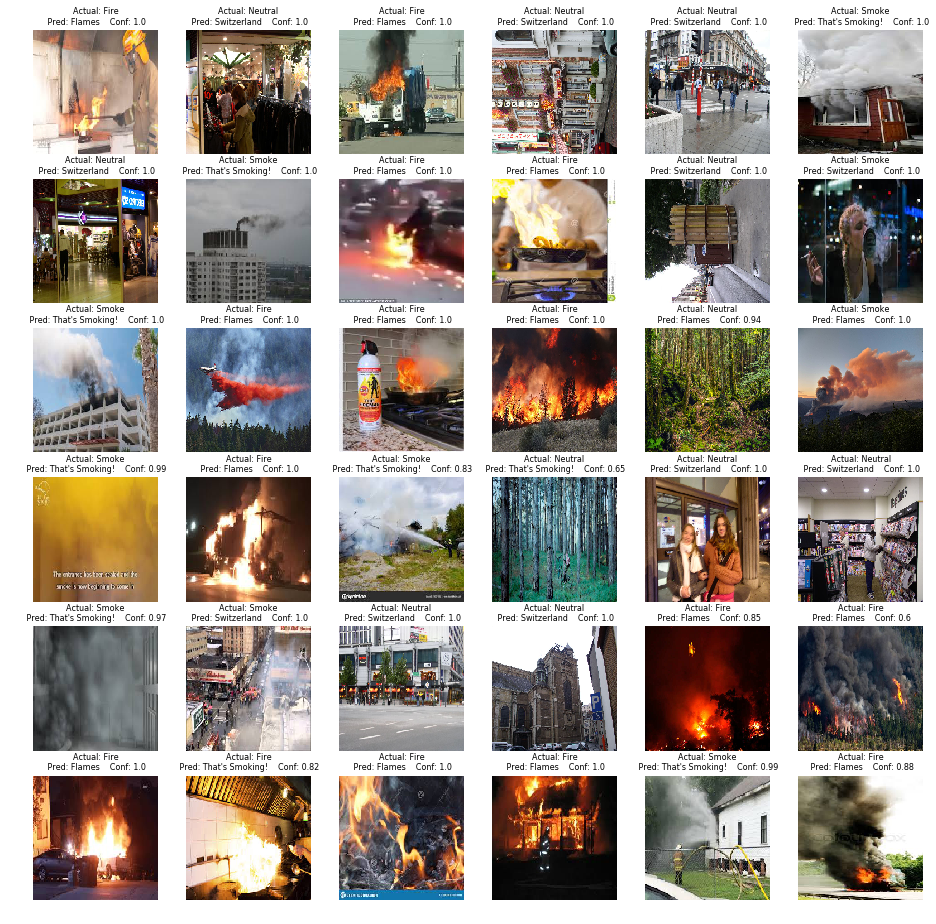

In [58]:
plot_batch(batch_df, grid_width=6, grid_height=6, im_scale_x=96, im_scale_y=96)

In [59]:
! ls -larp

total 1071560
drwxr-x--- 2 dsxuser dsxuser     20480 Jan  8 17:50 validation_data/
drwxr-x--- 2 dsxuser dsxuser     69632 Jan  8 17:50 training_data/
drwxr-x--- 2 dsxuser dsxuser     12288 Jan  8 17:50 test_data/
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_small.h5
-rw-r----- 1 dsxuser dsxuser 163795296 Jan  8 17:48 smoke_fire_vgg_big.h5
-rw-r----- 1 dsxuser dsxuser 163795336 Jan  8 18:11 smoke_fire_mobile_cloud.h5
-rw-r----- 1 dsxuser dsxuser 163795336 Jan  8 18:15 smoke_fire_cloudstinky.h5
-rw-r----- 1 dsxuser dsxuser 163795336 Jan  8 18:16 smoke_fire_cloud_stinky.h5
-rw-r----- 1 dsxuser dsxuser  58125680 Jan  8 17:48 fire-smoke-neutral-inference-images.zip
drwxr-x--- 5 dsxuser dsxuser      4096 Jan  8 17:49 fire-smoke-neutral-inference-images/
-rw-r----- 1 dsxuser dsxuser 220024640 Jan  8 17:48 FIRE-SMOKE-DATASET.zip
drwxr-x--- 4 dsxuser dsxuser      4096 Jan  8 17:48 FIRE-SMOKE-DATASET/
drwx------ 1 dsxuser dsxuser      4096 Jan  8 17:49 ../
drwxr-x--- 7 dsxu

In [62]:
os.path.isfile(model_name)

True

In [ ]:
# Verification = 

# Something something  + os.path.isfile(model_name)  -  Will return True / False if the model was trained and saved. False if not.  

